In [1]:
# imports


# python standard libraries
import os
import random
import fnmatch
import datetime
import pickle

# data processing
import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" % x})

import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_colwidth', 200)

# tensorflow
import tensorflow as tf
import keras
from keras.models import Sequential  # V2 is tensorflow.keras.xxxx, V1 is keras.xxx
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.models import load_model

print( f'tf.__version__: {tf.__version__}' )
print( f'keras.__version__: {keras.__version__}' )

# sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# imaging
#import cv2
#from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image

Using TensorFlow backend.


tf.__version__: 2.0.0
keras.__version__: 2.2.4


image_path: /Users/brettadlard/OneDrive/UChicago/37011 - Deep Learning/Project/MSCA/37011_Deep_Learning/Project/data/1573062696_300_300.png
steering_Angle: 300.0 300.0


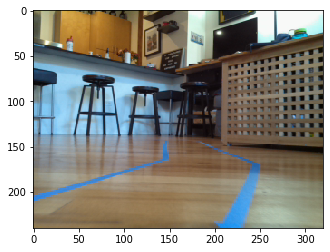

In [2]:
# import images
#!cd /#### YOUR DIRECTORY HERE ####
#!git clone https://github.com/badlard225/MSCA.git #### CLONES MY GIT HUB HERE, INCLUDES TOO MUCH INFO BUT SORRY

# !ls
import os
data_dir = '/#### YOUR DIRECTORY HERE, SAME AS ABOVE ####/MSCA/37011_Deep_Learning/Project/data'
file_list = os.listdir(data_dir)
image_paths = []
steering_angles = np.ndarray(shape=(0,2))
pattern = "*.png"
for filename in file_list:
    if fnmatch.fnmatch(filename, pattern):
        image_paths.append(os.path.join(data_dir,filename))
        right = int(filename[-7:-4])  
        left = int(filename[-11:-8])
        newrow = np.array([left,right])
        steering_angles = np.vstack([steering_angles, newrow])

image_index = 52 # TEST OUT IMAGES
plt.imshow(Image.open(image_paths[image_index]))
print("image_path: %s" % image_paths[image_index] )
print("steering_Angle: {} {}".format(steering_angles[image_index,0],steering_angles[image_index,1]))
df = pd.DataFrame()
df['ImagePath'] = image_paths
df['left'] = steering_angles[:,0]
df['right'] = steering_angles[:,1]

In [34]:
print(steering_angles)

[[300.0000 300.0000]
 [300.0000 300.0000]
 [250.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 235.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [250.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [250.0000 300.0000]
 [300.0000 205.0000]
 [300.0000 190.0000]
 [300.0000 300.0000]
 [210.0000 300.0000]
 [300.0000 225.0000]
 [300.0000 205.0000]
 [300.0000 200.0000]
 [250.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 230.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 205.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [210.0000 300.0000]
 [300.0000 200.0000]
 [300.0000 200.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [250.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 205.0000]
 [300.0000 300.0000]
 [250.0000 300.0000]
 [300.0000 205.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [245.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [300.0000 300.0000]
 [250.0000 30